# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\Yash Khillare\\Desktop\\BV_Internship\\project\\income1.csv")

# Data Cleaning

In [3]:
df.head()

,age,workclass,education,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Adm-clerical,Male,2174,0,40,United-States,<=50K
1,50,State-gov,Bachelors,Exec-managerial,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Adm-clerical,Male,0,0,40,United-States,<=50K
3,28,Private,Bachelors,Exec-managerial,Female,0,0,40,Cuba,<=50K
4,52,State-gov,HS-grad,Exec-managerial,Male,0,0,45,United-States,>50K


In [4]:
df.dtypes

age                 int64
 workclass         object
 education         object
 occupation        object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

In [5]:
df.columns

Index(['age', ' workclass', ' education', ' occupation', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
# shape of the dataframe
df.shape

(370, 10)

In [7]:
# removing whitespaces
df.columns = df.columns.str.strip()
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [8]:
df.isnull().sum()

age               0
workclass         0
education         0
occupation        0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [9]:
# Rearranging the columns in df
dset = df[['native-country','workclass','education','occupation','sex', 'capital-gain',
       'capital-loss', 'hours-per-week','age','income']] 

In [10]:
dset.head()

,native-country,workclass,education,occupation,sex,capital-gain,capital-loss,hours-per-week,age,income
0,United-States,State-gov,Bachelors,Adm-clerical,Male,2174,0,40,39,<=50K
1,United-States,State-gov,Bachelors,Exec-managerial,Male,0,0,13,50,<=50K
2,United-States,Private,HS-grad,Adm-clerical,Male,0,0,40,38,<=50K
3,Cuba,Private,Bachelors,Exec-managerial,Female,0,0,40,28,<=50K
4,United-States,State-gov,HS-grad,Exec-managerial,Male,0,0,45,52,>50K


# EDA

In [11]:
dset.describe()

,capital-gain,capital-loss,hours-per-week,age
count,370.000000,370.000000,370.000000,370.000000
mean,515.572973,97.800000,39.716216,37.321622
std,2238.357084,414.045699,11.637851,13.211304
min,0.000000,0.000000,1.000000,17.000000
25%,0.000000,0.000000,40.000000,27.000000
50%,0.000000,0.000000,40.000000,35.000000
75%,0.000000,0.000000,42.000000,45.000000
max,20051.000000,2415.000000,98.000000,90.000000


In [12]:
dset.describe(include = 'object')

,native-country,workclass,education,occupation,sex,income
count,370,370,370,370,370,370
unique,6,2,2,3,2,2
top,United-States,Private,HS-grad,Adm-clerical,Male,<=50K
freq,361,319,207,127,243,292


In [13]:
dset.columns


Index(['native-country', 'workclass', 'education', 'occupation', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'age', 'income'],
      dtype='object')

# Exploring Numeric columns

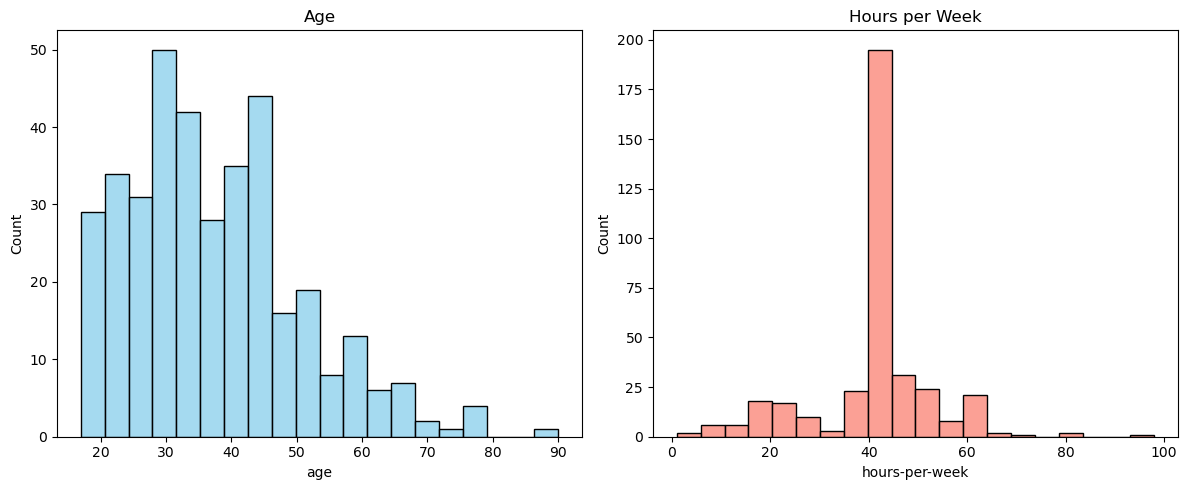

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# specifying the Axes object with the ax parameter

# For age
sns.histplot(dset['age'], bins=20, kde=False, color='skyblue', ax=axs[0])
axs[0].set_title('Age')

# For hours-per-week
sns.histplot(dset['hours-per-week'], bins=20, kde=False, color='salmon', ax=axs[1])
axs[1].set_title('Hours per Week')

plt.tight_layout()
plt.show()


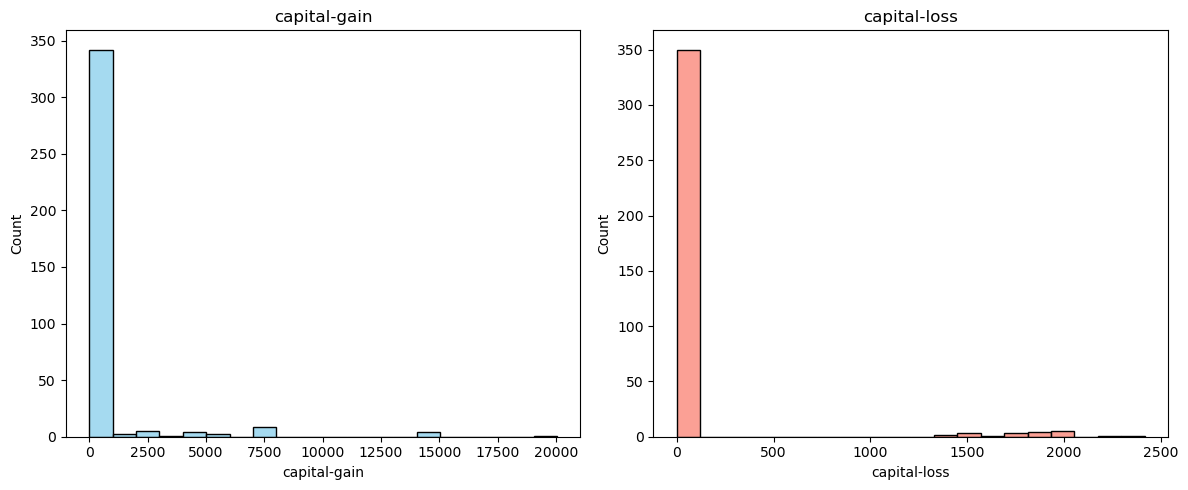

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
# Use seaborn's plotting functions specifying the Axes object with the ax parameter
sns.histplot(dset['capital-gain'], bins=20, kde=False, color='skyblue', ax=axs[0])
axs[0].set_title('capital-gain')

sns.histplot(dset['capital-loss'], bins=20, kde=False, color='salmon', ax=axs[1])
axs[1].set_title('capital-loss')

plt.tight_layout()
plt.show()

### Excluding `capital-gain` and `capial-loss` from the dset dataframe as it contains 0 values in majority.

In [16]:
dset = dset.drop(['capital-gain','capital-loss'], axis = 1)

In [17]:
print(df.shape, dset.shape)

(370, 10) (370, 8)


## Exploring categorical data

In [18]:
dset.columns

Index(['native-country', 'workclass', 'education', 'occupation', 'sex',
       'hours-per-week', 'age', 'income'],
      dtype='object')

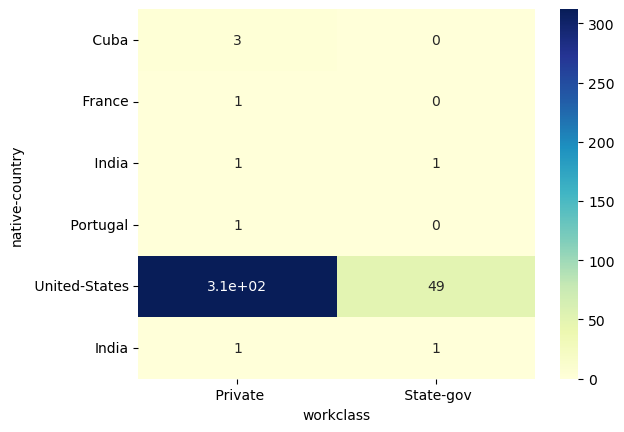

In [19]:
pivot_table = dset.pivot_table(index='native-country', columns='workclass', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu')
plt.show()


In [20]:
dset['native-country'].value_counts()

 United-States    361
 Cuba               3
 India              2
India               2
 Portugal           1
 France             1
Name: native-country, dtype: int64

In [21]:
dset['native-country'] = dset['native-country'].str.strip()
print(dset['native-country'].value_counts())

United-States    361
India              4
Cuba               3
Portugal           1
France             1
Name: native-country, dtype: int64


## This dataset is baised on United-States as there is a majority of US entries as compared to rest of the countries

In [22]:
dset.describe(include='object')

,native-country,workclass,education,occupation,sex,income
count,370,370,370,370,370,370
unique,5,2,2,3,2,2
top,United-States,Private,HS-grad,Adm-clerical,Male,<=50K
freq,361,319,207,127,243,292


In [23]:
print(dset['workclass'].value_counts())
print('\n')
print(dset['education'].value_counts())
print('\n')
print(dset['occupation'].value_counts())
print('\n')
print(dset['sex'].value_counts())
print('\n')
print(dset['income'].value_counts())



 Private      319
 State-gov     51
Name: workclass, dtype: int64


 HS-grad      207
 Bachelors    163
Name: education, dtype: int64


 Adm-clerical       127
 Sales              123
 Exec-managerial    120
Name: occupation, dtype: int64


 Male      243
 Female    127
Name: sex, dtype: int64


 <=50K    292
 >50K      78
Name: income, dtype: int64


In [24]:
# removing whitespaces from the dataframe
dset = dset.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [25]:
print(dset['workclass'].value_counts())
print('\n')
print(dset['education'].value_counts())
print('\n')
print(dset['occupation'].value_counts())
print('\n')
print(dset['sex'].value_counts())
print('\n')
print(dset['income'].value_counts())

Private      319
State-gov     51
Name: workclass, dtype: int64


HS-grad      207
Bachelors    163
Name: education, dtype: int64


Adm-clerical       127
Sales              123
Exec-managerial    120
Name: occupation, dtype: int64


Male      243
Female    127
Name: sex, dtype: int64


<=50K    292
>50K      78
Name: income, dtype: int64


In [26]:
dset.head()

,native-country,workclass,education,occupation,sex,hours-per-week,age,income
0,United-States,State-gov,Bachelors,Adm-clerical,Male,40,39,<=50K
1,United-States,State-gov,Bachelors,Exec-managerial,Male,13,50,<=50K
2,United-States,Private,HS-grad,Adm-clerical,Male,40,38,<=50K
3,Cuba,Private,Bachelors,Exec-managerial,Female,40,28,<=50K
4,United-States,State-gov,HS-grad,Exec-managerial,Male,45,52,>50K


# Spiting data into Independent variable and Dependent Variable

In [27]:
x = dset.iloc[:,0:-1].values
y= dset.iloc[:,-1].values

In [28]:
print(x[0])

['United-States' 'State-gov' 'Bachelors' 'Adm-clerical' 'Male' 40 39]


In [29]:
print(y)

['<=50K' '<=50K' '<=50K' '<=50K' '>50K' '>50K' '>50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '>50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K'
 '>50K' '>50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '>50K' '>50K' '>50K' '>50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '>50K' '<=50K' '>50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '>50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K'
 '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K'
 

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Corrected version
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1, 2, 3,4])],remainder= 'passthrough')
x = ct.fit_transform(x)

In [31]:
print(x[0])

[0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 40 39]


In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y =le.fit_transform(y)

In [33]:
print(y)

[0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0]


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [35]:
print(X_train[0])

[0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 40 25]


# Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[:,-2:] = sc.fit_transform(X_train[:,-2:])
X_test[:,-2:] = sc.fit_transform(X_test[:,-2:])

In [37]:
print(X_train[0])

[0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0
 0.0724609959714211 -0.9097741225609248]


# ML Model : Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[70  3]
 [15  5]]


0.8064516129032258

In [40]:
# Example new data point (before any transformation)
new_data = np.array([['United-States', 'State-gov', 'Bachelors', 'Exec-managerial', 'Male', 40, 39]])

# Transform new data using the same transformation used on the training data
new_data_transformed = ct.transform(new_data)
new_data_transformed[:, -2:] = sc.transform(new_data_transformed[:, -2:])

# Predict using the fitted classifier
new_pred = classifier.predict(new_data_transformed)
print(new_pred)


[0]


D:\Conda\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
